In [71]:
import numpy as np
import sounddevice as sd
import time
import pyaudio
import matplotlib.pyplot as plt
import scipy

def pyaudio_play(s,fs):
    p = pyaudio.PyAudio()
    # per @yahweh comment explicitly convert to bytes sequence
    output_bytes = (.5 * np.float32(s)).tobytes()

    # for paFloat32 sample values must be in range [-1.0, 1.0]
    stream = p.open(format=pyaudio.paFloat32,
                    channels=1,
                    rate=fs,
                    output=True)

    # play. May repeat with different volume values (if done interactively)
    stream.write(output_bytes)
    stream.stop_stream()
    stream.close()

    p.terminate()


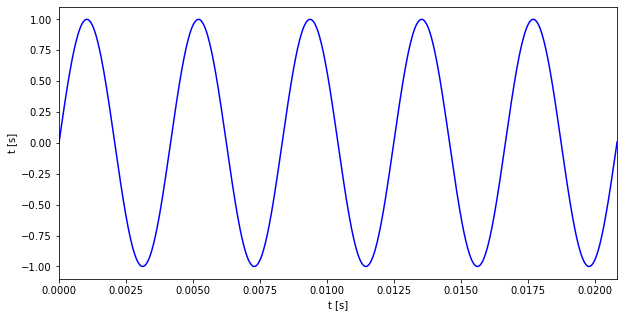

In [78]:
#Build the first signal 
#sampling frequency in Hz
sf=44100
dt=1/sf

#length of the signal in s
T=4
t=np.arange(0,T+dt,dt)


#Frequency of 1st signal
f1=240
#first signal definition
s1=np.sin(2*np.pi*f1*t)
#s1=scipy.signal.square(2*np.pi*f1*t)

#Plot first signal
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(t,s1,'-b')
ax.set_xlabel('t [s]')
ax.set_ylabel('t [s]')
ax.set_xlim(0,5/f1)
plt.show()

#play first signal
pyaudio_play(s1,sf)



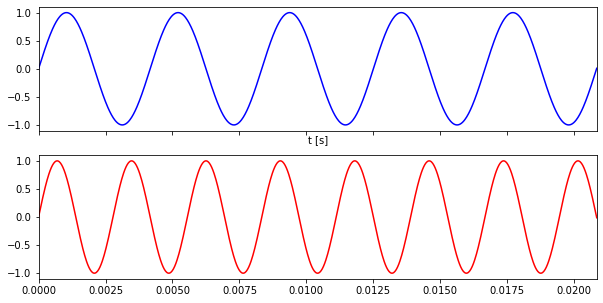

In [79]:
#Frequency of the 2nd signal
f2=f1*(3/2)
#f2=f1*((1+np.sqrt(5))/2)#(16/15)

#Definition of the 2nd signal
s2=np.sin(2*np.pi*f2*t)
#s2=scipy.signal.square(2*np.pi*f2*t)

#plot both signals
fig, ax = plt.subplots(2,1,figsize=(10,5),sharex=True)
ax[0].plot(t,s1,'-b')
ax[1].plot(t,s2,'-r')
ax[0].set_xlabel('t [s]')
ax[0].set_xlim(0,5/f1)
plt.show()

#play first signal
pyaudio_play(s1,sf)
#play first and 2nd signal together
pyaudio_play(s1+s2,sf)
